# Importing Libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Data Preprocessing

In [64]:
churn_data = pd.read_csv('Data/churn_data.csv')
churn_data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [65]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [66]:
# Replacing columns names to replace spaces with _
churn_data.columns = churn_data.columns.str.replace(' ', '_')
churn_data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Before developing our models, we need to preprocess our data such as encoding our categorical columns and normalizing our data if needed.

In [67]:
for col in churn_data.columns:
    print(churn_data[col].value_counts())

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
MT     68
NJ     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account_length, Length: 212, dtype: int64
415    1655
510     840
408     838
Name: area_code, dtype: int64
347-3958    1
344-6258    1
384-6132    1
330-1175    1
391-8087    1
           ..
337-3932    1
406-4588    1
348-6008    1
390-3761    1
399-4246    1
Name: phone_number, Length: 3333, dtype: int64
no     3010
yes     323
Name: internati

The following columns will need to be addressed:

* state needs to be one hot encoded as the values are the state's initials
* international plan, voice mail plan, churn should be converted to binary columns

In [68]:
cols = ['voice_mail_plan', 'international_plan']

#Change categorical columns to binary columns
churn_data['voice_mail_plan'] = churn_data['voice_mail_plan'].replace({'no': 0, 'yes': 1})
churn_data['international_plan'] = churn_data['international_plan'].replace({'no': 0, 'yes': 1})
churn_data['churn'] = churn_data.churn.astype('float')

In [69]:
#confirm datatype changes
churn_data.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                     float64
dtype: object

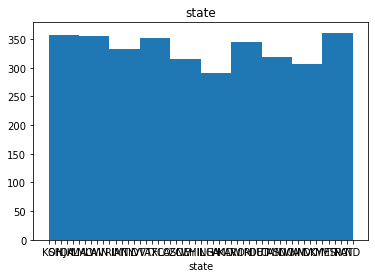

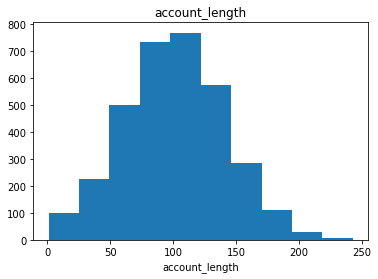

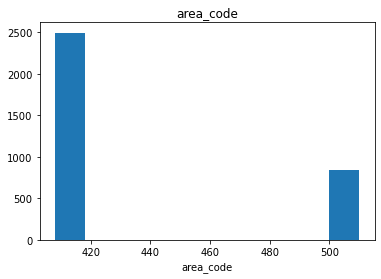

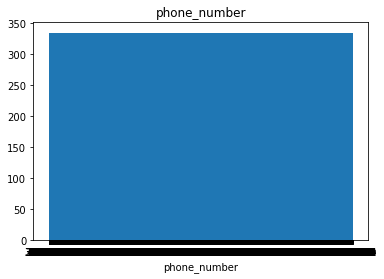

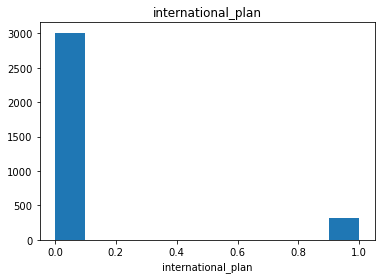

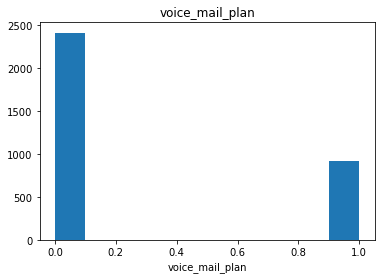

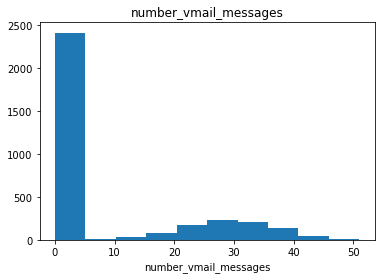

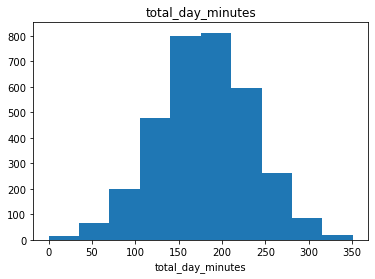

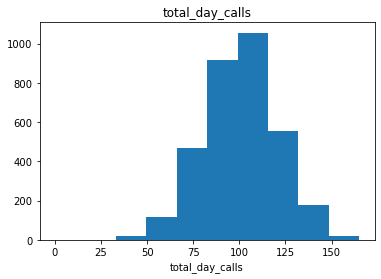

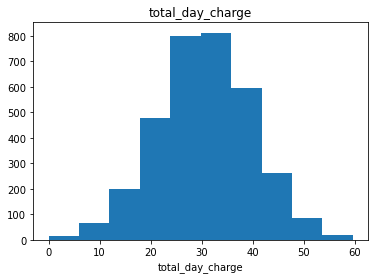

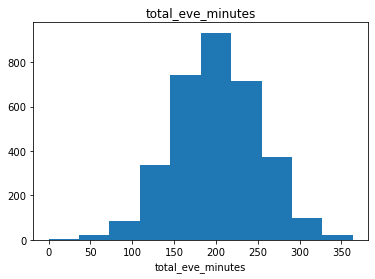

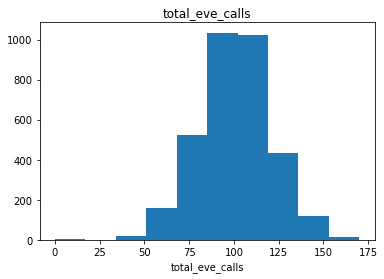

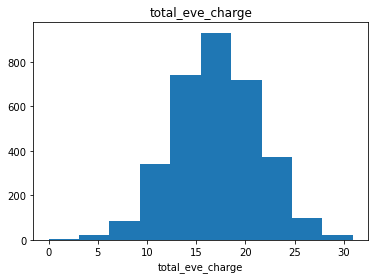

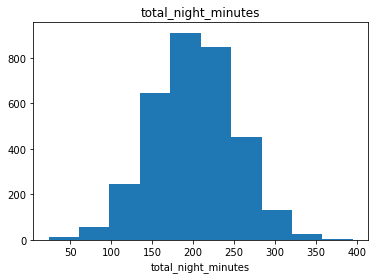

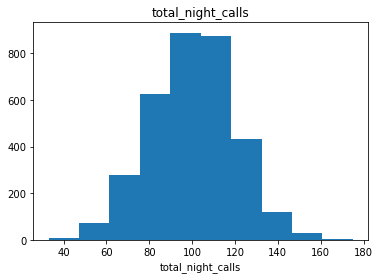

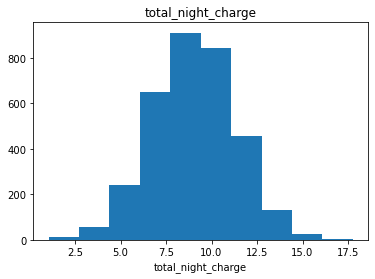

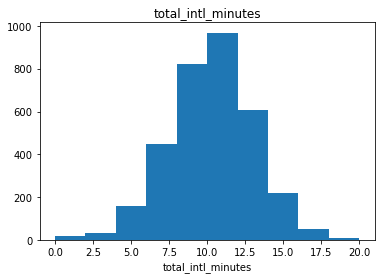

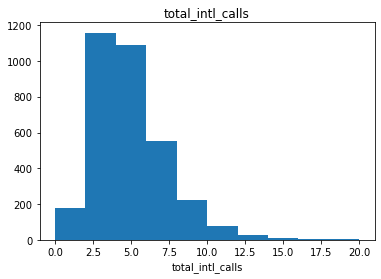

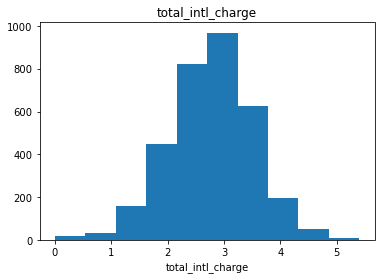

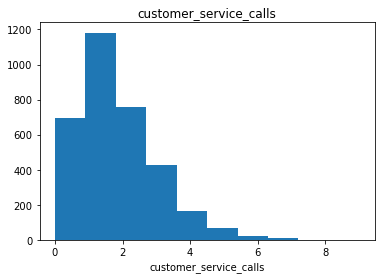

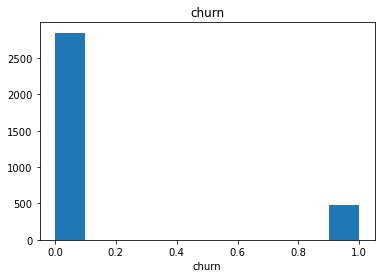

In [70]:
# Loop through each column to see which columns are categorical
for col in churn_data.columns: 
    plt.hist(churn_data[col], label=col)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

## Check for correlations

Before proceeding with further data engineering, we must check for multicollinearity or if multiple columns are correlated with one another.

In [71]:
churn_data.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


<AxesSubplot:>

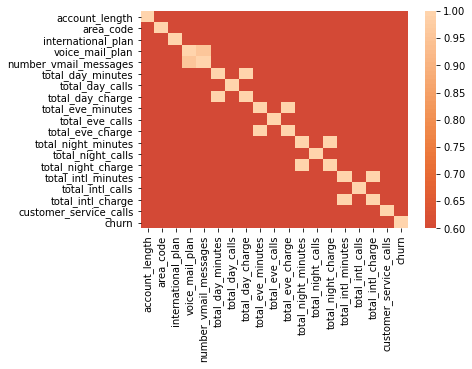

In [72]:
sns.heatmap(churn_data.corr(), center=0,vmin = 0.60)

High correlation between voicemail columns, daycharge and day mins, eve charge and eve mins, night charge and night mins, intl minutes and intl charge

In [73]:
#churn_data['avg_day_call_length'] = churn_data['total_day_minutes'] / churn_data['total_day_calls']
churn_data['avg_day_call_charge'] = churn_data['total_day_charge'] / churn_data['total_day_calls']
churn_data['avg_eve_call_charge'] = churn_data['total_eve_charge'] / churn_data['total_eve_calls']
churn_data['avg_night_call_charge'] = churn_data['total_night_charge'] / churn_data['total_night_calls']
churn_data['avg_intl_call_charge'] = churn_data['total_intl_charge'] / churn_data['total_intl_calls']

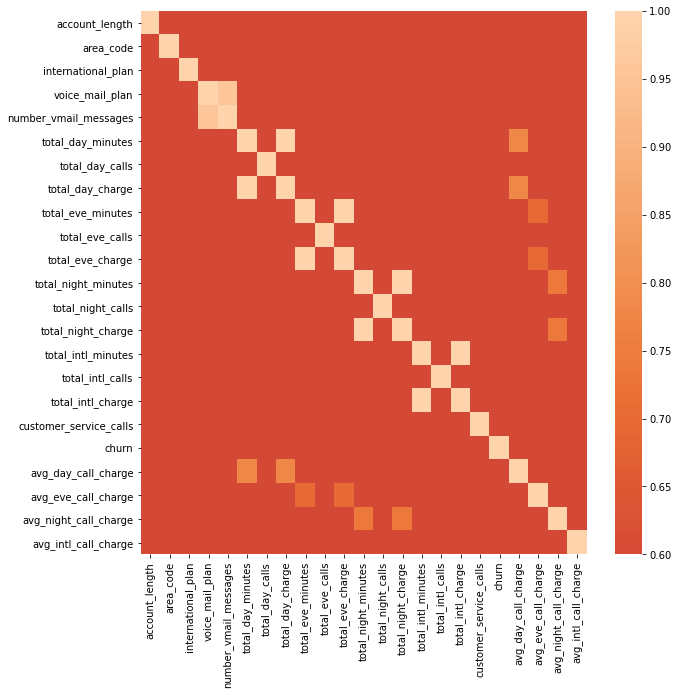

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(churn_data.corr(), center=0,vmin = 0.60)
plt.show()

These new columns are showing colinearity with their respective minutes and charge columns. I will remove those columns.

In [75]:
churn_data = churn_data.drop(columns = ['total_day_charge','total_day_minutes',
                                        'total_eve_charge', 'total_eve_minutes',
                                       'total_night_charge', 'total_night_minutes',
                                       'total_intl_charge', 'total_intl_minutes'])

churn_data.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls,churn,avg_day_call_charge,avg_eve_call_charge,avg_night_call_charge,avg_intl_call_charge
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.038470,0.019260,-0.013176,0.020661,-0.003796,0.016541,-0.012871,-0.027053,-0.004069,-0.012415
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.009646,-0.011886,0.016522,-0.024179,0.027572,0.006174,-0.006096,0.004193,-0.012159,0.012875
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.003755,0.006114,0.012451,0.017366,-0.024522,0.259852,0.042181,0.000730,-0.029642,0.003362
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.011086,-0.006444,0.015553,0.007618,-0.017824,-0.102148,0.005073,0.012526,-0.004073,-0.012585
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,-0.009548,-0.005864,0.007123,0.013957,-0.013263,-0.089728,0.005896,0.007796,0.003046,-0.014202
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,1.000000,0.006462,-0.019557,0.004574,-0.018942,0.018459,-0.569642,-0.020222,0.029704,-0.019275
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.006462,1.000000,0.007710,0.017434,0.002423,0.009233,0.008610,-0.626207,-0.010634,0.000012
total_night_calls,-0.013176,0.016522,0.012451,0.015553,0.007123,-0.019557,0.007710,1.000000,0.000305,-0.012802,0.006141,0.022758,0.003212,-0.614355,-0.010805
total_intl_calls,0.020661,-0.024179,0.017366,0.007618,0.013957,0.004574,0.017434,0.000305,1.000000,-0.017561,-0.052844,0.007341,-0.008972,-0.012397,-0.673894
customer_service_calls,-0.003796,0.027572,-0.024522,-0.017824,-0.013263,-0.018942,0.002423,-0.012802,-0.017561,1.000000,0.208750,-0.003723,-0.002690,-0.000140,-0.001555


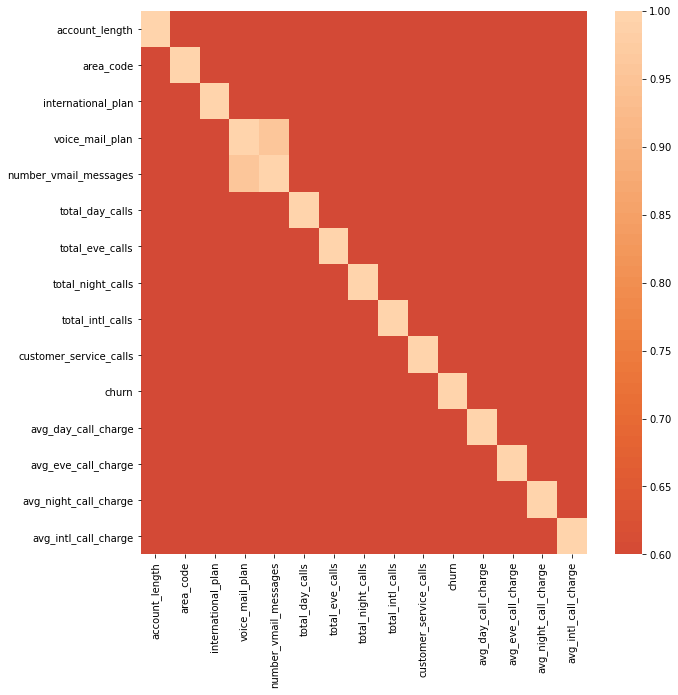

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(churn_data.corr(), center=0,vmin = 0.60)
plt.show()

The last columns to address are the voicemail related ones

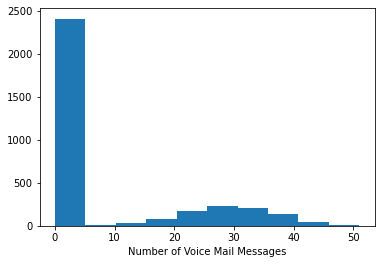

In [77]:
plt.hist(churn_data['number_vmail_messages'])
plt.xlabel('Number of Voice Mail Messages')
plt.show()

Due to the high number of customers that don't have voicemail plans, it would be better to simply remove the column containing the number of voicemails.

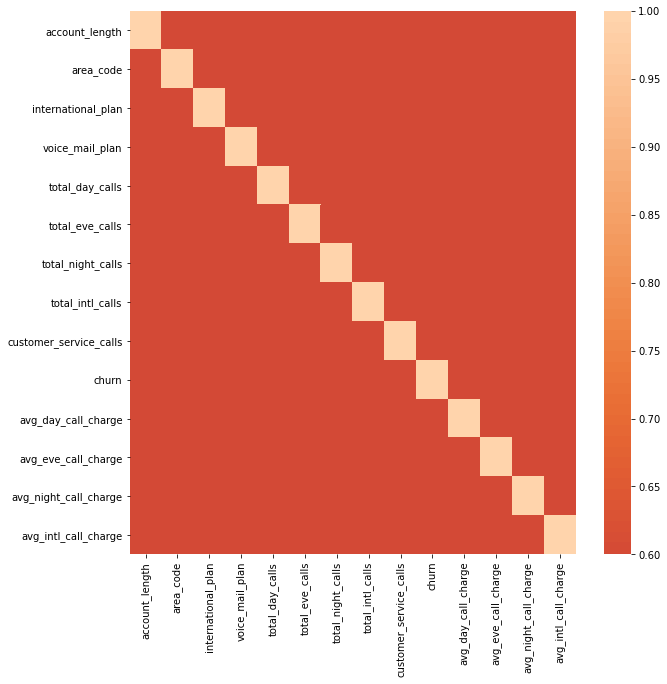

In [78]:
churn_data = churn_data.drop(columns = ['number_vmail_messages'])

plt.figure(figsize=(10,10))
sns.heatmap(churn_data.corr(), center=0,vmin = 0.60)
plt.show()

Looks like our columns are in good shape.

## One Hot Encoding

In [79]:
# One hot encoding for 'State' column
churn_data = pd.get_dummies(churn_data, columns = ['state'])
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   object 
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   total_day_calls         3333 non-null   int64  
 6   total_eve_calls         3333 non-null   int64  
 7   total_night_calls       3333 non-null   int64  
 8   total_intl_calls        3333 non-null   int64  
 9   customer_service_calls  3333 non-null   int64  
 10  churn                   3333 non-null   float64
 11  avg_day_call_charge     3331 non-null   float64
 12  avg_eve_call_charge     3332 non-null   float64
 13  avg_night_call_charge   3333 non-null   float64
 14  avg_intl_call_charge    3315 non-null   

In [80]:
#Removing unnecessary columns
churn_data = churn_data.drop(columns = ['phone_number', 'area_code'])

In [81]:
#Confirming changes
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int64  
 2   voice_mail_plan         3333 non-null   int64  
 3   total_day_calls         3333 non-null   int64  
 4   total_eve_calls         3333 non-null   int64  
 5   total_night_calls       3333 non-null   int64  
 6   total_intl_calls        3333 non-null   int64  
 7   customer_service_calls  3333 non-null   int64  
 8   churn                   3333 non-null   float64
 9   avg_day_call_charge     3331 non-null   float64
 10  avg_eve_call_charge     3332 non-null   float64
 11  avg_night_call_charge   3333 non-null   float64
 12  avg_intl_call_charge    3315 non-null   float64
 13  state_AK                3333 non-null   uint8  
 14  state_AL                3333 non-null   

In [82]:
churn_data.describe()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,customer_service_calls,churn,avg_day_call_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,100.435644,100.114311,100.107711,4.479448,1.562856,0.144914,0.318338,...,0.018002,0.015902,0.021602,0.021602,0.023102,0.021902,0.019802,0.023402,0.031803,0.023102
std,39.822106,0.295879,0.447398,20.069084,19.922625,19.568609,2.461214,1.315491,0.352067,0.124365,...,0.132978,0.125114,0.145402,0.145402,0.150251,0.146386,0.139340,0.151200,0.175502,0.150251
min,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.003894,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,87.000000,87.000000,87.000000,3.000000,1.000000,0.000000,0.234592,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,0.000000,101.000000,100.000000,100.000000,4.000000,1.000000,0.000000,0.304455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,0.000000,1.000000,114.000000,114.000000,113.000000,6.000000,2.000000,0.000000,0.384578,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,243.000000,1.000000,1.000000,165.000000,170.000000,175.000000,20.000000,9.000000,1.000000,1.228000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Due to the range of values within these columns, the columns will need to scaled prior to modeling.

# Saving Preprocessed Data

In [83]:
churn_data.to_csv('Data/processed_churn.csv', index = False)